In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.linear_model import LinearRegression
raw_data=pd.read_csv(r'C:\Users\LasimaSN\Downloads\The Data Science Course 2020 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S36_L247\Bank-data.csv')
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [9]:
data=raw_data.copy()
data['y']=data['y'].map({'yes':1,'no':0})
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [10]:
y=data['y']
x1=data['duration']

In [11]:
x=sm.add_constant(x1)

In [13]:
results= sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:                  0.2121
Time:                        13:28:09   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

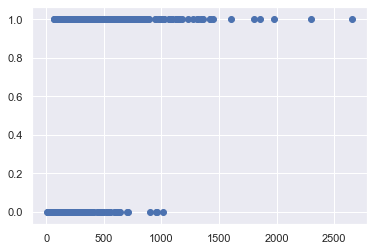

In [17]:
plt.scatter(x1,y)
plt.show()

In [20]:
estimators=['interest_rate','march','credit','previous','duration']
x=data[estimators]


In [21]:
y=data['y']

In [22]:
X=sm.add_constant(x)
results=sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:                  0.5143
Time:                        13:45:32   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

In [24]:
results.pred_table()

array([[218.,  41.],
       [ 30., 229.]])

In [25]:
cm= pd.DataFrame(results.pred_table())

In [26]:
cm.columns=['Predicted 0', 'Predicted 1']
cm=cm.rename({0:'Actual 0',1:'Actual 1'})

In [27]:
cm

,Predicted 0,Predicted 1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [31]:
c=np.array(cm)
accuracy=(c[0,0]+c[1,1])/c.sum()
accuracy

0.862934362934363